In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
trainset = pd.read_csv('train.csv')

In [4]:
testset = pd.read_csv('test.csv')

In [5]:
trainset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
testset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
trainset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

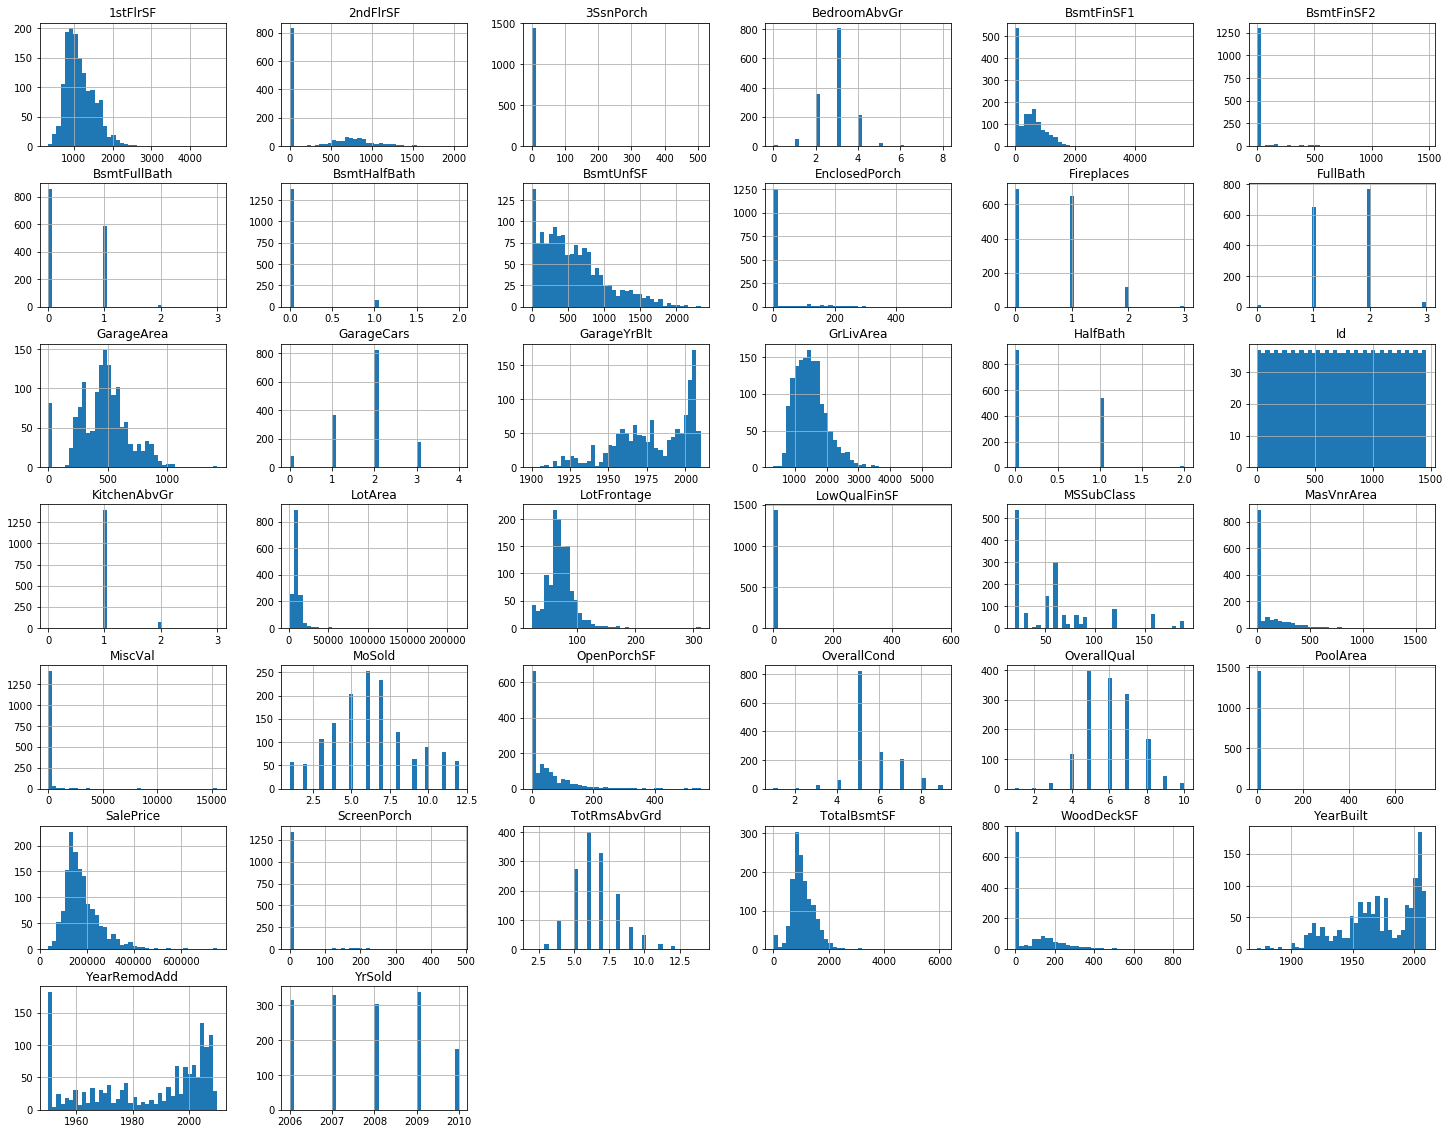

In [13]:
#visualising the data
trainset.hist(bins=40, figsize=(25,20))
plt.show()

In [12]:
#checking the correlations
corr_matrix = trainset.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A08840C08>


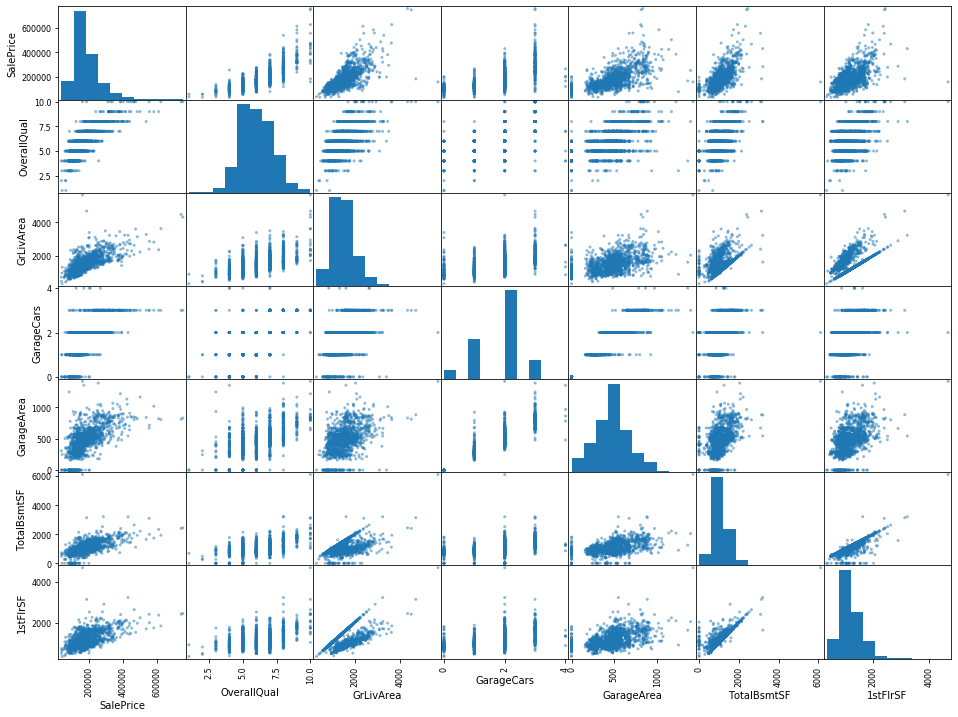

In [11]:
#visualising the variables most correlated with sale price
from pandas.plotting import scatter_matrix

attributes = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
print(scatter_matrix(trainset[attributes], figsize = (16, 12)))

# missing values will be imputed one by one based on the description file

In [15]:
trainset_nan = (trainset.isnull().sum() / len(trainset)) * 100
trainset_nan = trainset_nan.drop(trainset_nan[trainset_nan == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :trainset_nan})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [16]:
testset_nan = (testset.isnull().sum() / len(testset)) * 100
testset_nan = testset_nan.drop(trainset_nan[testset_nan == 0].index).sort_values(ascending=False)[:30]
missing_data_test = pd.DataFrame({'Missing Ratio' :testset_nan})
missing_data_test.head(35)

,Missing Ratio
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageCond,5.346127
GarageQual,5.346127
GarageYrBlt,5.346127
GarageFinish,5.346127


In [17]:
#the large portion of missing data in the poolqc, miscfeature, alley, fence, fireplace results from the fact that
#those houses lack these features, however the presence of these features could impact the price substantially,
#therefore instead of removing these columns values will be imputed as 'none'

In [18]:
trainset["PoolQC"] = trainset["PoolQC"].fillna("None")
trainset["MiscFeature"] = trainset["MiscFeature"].fillna("None")
trainset["Alley"] = trainset["Alley"].fillna("None")
trainset["Fence"] = trainset["Fence"].fillna("None")
trainset["FireplaceQu"] = trainset["FireplaceQu"].fillna("None")

In [19]:
# Lot frontage will be imputed using the median value

In [20]:
median = trainset['LotFrontage'].median()
trainset['LotFrontage'].fillna(median, inplace = True)

In [21]:
# no value in the following values relating to the garage result from absence of one, again will be imputed with 'none'

In [22]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    trainset[col] = trainset[col].fillna('None')

In [23]:
# following variables again relate to the garage but accept numerical inputs, therefore will be imputed with '0'

In [24]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    trainset[col] = trainset[col].fillna(0)

In [25]:
#same thing as with the garage but for the basement

In [26]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    trainset[col] = trainset[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    trainset[col] = trainset[col].fillna('None')

In [27]:
#same for masonry veneer

In [28]:
trainset["MasVnrType"] = trainset["MasVnrType"].fillna("None")
trainset["MasVnrArea"] = trainset["MasVnrArea"].fillna(0)

In [29]:
#for zoning classification fill it in with the mode

In [30]:
trainset['MSZoning'] = trainset['MSZoning'].fillna(trainset['MSZoning'].mode()[0])

In [31]:
#utilities is nearly entirely populated with PubAll so will be dropped

In [32]:
trainset = trainset.drop(['Utilities'], axis=1)

In [33]:
#NA in functional means typical

In [34]:
trainset["Functional"] = trainset["Functional"].fillna("Typ")

In [35]:
#Electrical, kitchen quality, exterior 1 and 2 and sale type will be imputed using mode given low number of missing values

In [36]:
trainset['Electrical'] = trainset['Electrical'].fillna(trainset['Electrical'].mode()[0])
trainset['KitchenQual'] = trainset['KitchenQual'].fillna(trainset['KitchenQual'].mode()[0])
trainset['Exterior1st'] = trainset['Exterior1st'].fillna(trainset['Exterior1st'].mode()[0])
trainset['Exterior2nd'] = trainset['Exterior2nd'].fillna(trainset['Exterior2nd'].mode()[0])
trainset['SaleType'] = trainset['SaleType'].fillna(trainset['SaleType'].mode()[0])

In [37]:
#no building class imputed with 'none'

In [38]:
trainset['MSSubClass'] = trainset['MSSubClass'].fillna("None")

# same will be done for test set

In [39]:
testset["PoolQC"] = testset["PoolQC"].fillna("None")
testset["MiscFeature"] = testset["MiscFeature"].fillna("None")
testset["Alley"] = testset["Alley"].fillna("None")
testset["Fence"] = testset["Fence"].fillna("None")
testset["FireplaceQu"] = testset["FireplaceQu"].fillna("None")
median = testset['LotFrontage'].median()
testset['LotFrontage'].fillna(median, inplace = True)
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    testset[col] = testset[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    testset[col] = testset[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    testset[col] = testset[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    testset[col] = testset[col].fillna('None')
testset["MasVnrType"] = testset["MasVnrType"].fillna("None")
testset["MasVnrArea"] = testset["MasVnrArea"].fillna(0)
testset['MSZoning'] = testset['MSZoning'].fillna(testset['MSZoning'].mode()[0])
testset = testset.drop(['Utilities'], axis=1)
testset["Functional"] = testset["Functional"].fillna("Typ")
testset['Electrical'] = testset['Electrical'].fillna(testset['Electrical'].mode()[0])
testset['Exterior1st'] = testset['Exterior1st'].fillna(testset['Exterior1st'].mode()[0])
testset['Exterior2nd'] = testset['Exterior2nd'].fillna(testset['Exterior2nd'].mode()[0])
testset['SaleType'] = testset['SaleType'].fillna(testset['SaleType'].mode()[0])
testset['MSSubClass'] = testset['MSSubClass'].fillna("None")

In [40]:
testset['KitchenQual'] = testset['KitchenQual'].fillna(testset['KitchenQual'].mode()[0])

In [41]:
trainset_nan = (trainset.isnull().sum() / len(trainset)) * 100
trainset_nan = trainset_nan.drop(trainset_nan[trainset_nan == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :trainset_nan})
missing_data.head(20)

,Missing Ratio


In [42]:
testset_nan = (testset.isnull().sum() / len(testset)) * 100
testset_nan = testset_nan.drop(trainset_nan[testset_nan == 0].index).sort_values(ascending=False)[:30]
missing_data_test = pd.DataFrame({'Missing Ratio' :testset_nan})
missing_data_test.head(35)

,Missing Ratio
SaleCondition,0.0
Foundation,0.0
RoofMatl,0.0
Exterior1st,0.0
Exterior2nd,0.0
MasVnrType,0.0
MasVnrArea,0.0
ExterQual,0.0
ExterCond,0.0
BsmtQual,0.0


In [43]:
#no missing data left in neither set

In [44]:
#some variables such as year or month sold, MSSubClass and OverallCond should be categorical and will be transformed for both datasets

In [45]:
trainset['MSSubClass'] = trainset['MSSubClass'].apply(str)
trainset['OverallCond'] = trainset['OverallCond'].astype(str)
trainset['YrSold'] = trainset['YrSold'].astype(str)
trainset['MoSold'] = trainset['MoSold'].astype(str)

In [46]:
testset['MSSubClass'] = testset['MSSubClass'].apply(str)
testset['OverallCond'] = testset['OverallCond'].astype(str)
testset['YrSold'] = testset['YrSold'].astype(str)
testset['MoSold'] = testset['MoSold'].astype(str)

In [47]:
#encoding the variables, deploying ridge and lasso techniques, getting the datafiles

In [48]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [49]:
cat_cols = ['MSSubClass']
num_cols = []
for col in trainset.columns:
    if trainset[col].dtype == object:
              cat_cols = cat_cols + [col]
    else:
        num_cols = num_cols + [col]
        
num_cols.remove('SalePrice')
            
get_cat_data = FunctionTransformer(lambda x: x[cat_cols].values, validate=False)
get_num_data = FunctionTransformer(lambda x: x[num_cols].values, validate=False)

preprocessing_cat = Pipeline([('selector', get_cat_data),('encoder',OneHotEncoder(handle_unknown='ignore'))])
preprocessing_num = Pipeline([('selector', get_num_data),('scaler',StandardScaler())])

preprocessing_all = FeatureUnion(transformer_list = [('cat_features',preprocessing_cat),('num_features',preprocessing_num)])
                             
model_ridge = Pipeline([('preprocessing',preprocessing_all),('reg',Ridge())])
model_lasso = Pipeline([('preprocessing',preprocessing_all),('reg',Lasso())])

In [50]:
y = trainset['SalePrice'].values
alpha = [0.1,0.3,1,10,30,100,300]
param_grid = dict(reg__alpha=alpha)

grid_ridge = GridSearchCV(model_ridge, param_grid=param_grid, cv=5,scoring='neg_root_mean_squared_error')
grid_lasso = GridSearchCV(model_lasso, param_grid=param_grid, cv=5,scoring='neg_root_mean_squared_error')

grid_ridge_result = grid_ridge.fit(trainset,y)
grid_lasso_result = grid_lasso.fit(trainset,y)

C:\Users\Dominik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162907991841.2702, tolerance: 759214014.2531198
  max_iter, tol, rng, random, positive)
C:\Users\Dominik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180408142396.71472, tolerance: 728773513.025937
  max_iter, tol, rng, random, positive)
C:\Users\Dominik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162072022290.79733, tolerance: 699031751.5199751
  max_iter, tol, rng, random, positive)
C:\Users\Dominik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:460: ConvergenceWarnin

In [51]:
best_score_ridge, best_params_ridge = -grid_ridge_result.best_score_,grid_ridge_result.best_params_
best_score_lasso, best_params_lasso = -grid_lasso_result.best_score_,grid_lasso_result.best_params_
print("Ridge - RMSE: %f using %s" % (best_score_ridge, best_params_ridge))
print("Lasso - RMSE: %f using %s" % (best_score_lasso, best_params_lasso))

Ridge - RMSE: 31484.547152 using {'reg__alpha': 30}
Lasso - RMSE: 30653.431465 using {'reg__alpha': 100}


In [52]:
predictions_ridge = grid_ridge_result.predict(testset)
predictions_lasso = grid_lasso_result.predict(testset)
output_ridge = pd.DataFrame({'Id': testset.Id, 'SalePrice': predictions_ridge})
output_lasso = pd.DataFrame({'Id': testset.Id, 'SalePrice': predictions_lasso})

In [53]:
output_ridge

,Id,SalePrice
0,1461,108505.530365
1,1462,152680.693237
2,1463,174398.335052
3,1464,192396.756755
4,1465,198996.720124
...,...,...
1454,2915,72705.693032
1455,2916,66885.331093
1456,2917,156403.753016
1457,2918,108200.398261


In [54]:
output_lasso

,Id,SalePrice
0,1461,117625.343978
1,1462,156339.399916
2,1463,179377.976301
3,1464,195190.363326
4,1465,206758.906286
...,...,...
1454,2915,79718.523731
1455,2916,68268.718271
1456,2917,165454.638082
1457,2918,115513.380631


In [55]:
output_ridge.to_csv('basic_ridge.csv', index=False)
output_lasso.to_csv('basic_lasso.csv', index=False)

In [54]:
#ridge submission score = .142
#lasso submission score = .15411